Dato:
Se utilizo como guía, análisis realizados por usuarios en keggle.
Se complemento principalmente la parte de inconsistencia en datos categoricos y datos anómados, con clases y prácticar liberadas por el profe, en github.
Se utilizo datos de DataCamp, especialmente para las visualizaciones.

# Analizando la Rotación de Clientes en Telecomunicaciones

In [61]:
# Importación de librerías
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import json
import re
import plotly.express as px
import seaborn as sns

In [28]:
# Leemos y cargamos el archivo que ya está en el repositorio
df = pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Limpieza de Datos con Python

### Identificar y solucionar cualquier valor duplicado

In [32]:
# Identificar duplicados 
duplicados = df.duplicated()
# Contar cantidad de duplicados 
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.head()

Número de registros duplicados: 0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.


#### Manejo de tipo de datos y corrección

In [38]:
# La columna Total Charges debería ser numérico pero está definido como object dentro del archivo original
# Convertimos a dato numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"el tipo de datos de la columna TotalCharges es: {df['TotalCharges'].dtype}")

el tipo de datos de la columna TotalCharges es: float64


In [35]:
# Validación de datos nulls luego del primer ajuste
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [40]:
# Eliminamos los valores nulos ya que son muy pocos datos en comparación con el dataframe total.
df.dropna(inplace=True)
# Verificamos nuevamente los valores nulls
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Tipo de datos final para cada columna

In [42]:
# Se eliminan los espacios en blanco de todos las columnas con tipo de datos str o string u object.
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

# Definir el diccionario de tipo de datos
diccionario = {
    'customerID': 'string',
    'gender': 'string',
    'SeniorCitizen': 'int64',
    'Partner': 'string',
    'Dependents': 'string',
    'tenure': 'int64',
    'PhoneService': 'string',
    'MultipleLines': 'string',
    'InternetService': 'string',
    'OnlineSecurity': 'string',
    'OnlineBackup': 'string',
    'DeviceProtection': 'string',
    'TechSupport': 'string',
    'StreamingTV': 'string',
    'StreamingMovies': 'string',
    'Contract': 'string',
    'PaperlessBilling': 'string',
    'PaymentMethod': 'string',
    'MonthlyCharges': 'float64',
    'TotalCharges': 'float64',
    'Churn': 'string'
}

df = df.astype(diccionario) 

## Identificar y solucionar cualquier punto de dato inapropiado o inusual
    Se omite el ejercicio de rellenar valores faltantes ya que en verificaciones iniciales no se encontraron nulls.

In [44]:
# Generamos una lista de los campos que son del tipo string o del tipo categoricos
lista = [campo for campo, tipo in diccionario.items() if tipo == 'string']
print(lista)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [48]:
def limpiar_cadena(cadena):
    """ 
    limpia una cadena de texto realizando las siguiente operaciones:
    1. convierte todo el texto a minúsculas.
    2. Elimina caracteres no imprimibles antes de la primera letra y después de la última, pero mantiene los internos.


    Quitado de la clase del profesor Ilker, donde nos enseño su resolución al exámen anterior

    """
    if isinstance (cadena, str):
        # convertir a minúsculas
        cadena  = cadena.lower()
        # eliminar caracteres no imprimibles antes de la primera letra y después de la última
        # buscarr la posición de la primera letra(a-z)
        primera_letra = re.search(r'[a-z]' , cadena)
        # Buscar la posición de la última letra (a-z)
        ultima_letra = re.search(r'[a-z](?!.*[a-z])', cadena)

        if primera_letra and ultima_letra:
            inicio = primera_letra.start()
            fin = ultima_letra.end()
            cadena = cadena[inicio:fin]
        else:
            # Si no se encuentran letras, eliminar espacios en blanco
            cadena = cadena.strip()
        
        return cadena
    return cadena

# Aplicar la limpieza a las columnas categóricas o string
for col in lista:
    df[col] = df[col].apply(limpiar_cadena)

# Verificar los campios 
for col in lista:
    print(f"\nValores únicos después de la limpieza en '{col}'")
    print(df[col].unique())


Valores únicos después de la limpieza en 'customerID'
['vhveg' 'gnvde' 'qpybk' ... 'jzazl' 'ltmkd' 'ajiek']

Valores únicos después de la limpieza en 'gender'
['female' 'male']

Valores únicos después de la limpieza en 'Partner'
['yes' 'no']

Valores únicos después de la limpieza en 'Dependents'
['no' 'yes']

Valores únicos después de la limpieza en 'PhoneService'
['no' 'yes']

Valores únicos después de la limpieza en 'MultipleLines'
['no phone service' 'no' 'yes']

Valores únicos después de la limpieza en 'InternetService'
['dsl' 'fiber optic' 'no']

Valores únicos después de la limpieza en 'OnlineSecurity'
['no' 'yes' 'no internet service']

Valores únicos después de la limpieza en 'OnlineBackup'
['yes' 'no' 'no internet service']

Valores únicos después de la limpieza en 'DeviceProtection'
['no' 'yes' 'no internet service']

Valores únicos después de la limpieza en 'TechSupport'
['no' 'yes' 'no internet service']

Valores únicos después de la limpieza en 'StreamingTV'
['no' 'yes' '

In [51]:
# Filtrar columnas con valores nulos
columnas_con_nulos = df.columns[df.isnull().sum() > 0]
print(columnas_con_nulos)


Index([], dtype='object')


## Revisión de datos inusuales

In [53]:
df.tenure.describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [57]:
fig = px.histogram(df, x='tenure', nbins=10, title='Permanencia de clientes')
# Mostrar la figura
fig.show()

In [54]:
df.MonthlyCharges.describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [58]:
fig = px.histogram(df, x='MonthlyCharges', nbins=10, title='Recarga por mes')
fig.show()

No se observa anomalías

## Exploración de datos con Python

### Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

#### Visualizacion univariada 1

<Axes: xlabel='Churn', ylabel='count'>

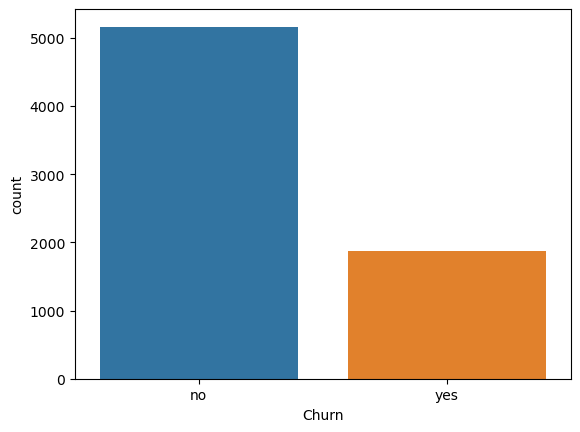

In [62]:
sns.countplot(df, x='Churn')

Podemos visualizar que la cantidad de clientes que no ha abandonado el servicio es significativamente mayor que lo que si han abandonado el servicio

#### Visualización univariada 2

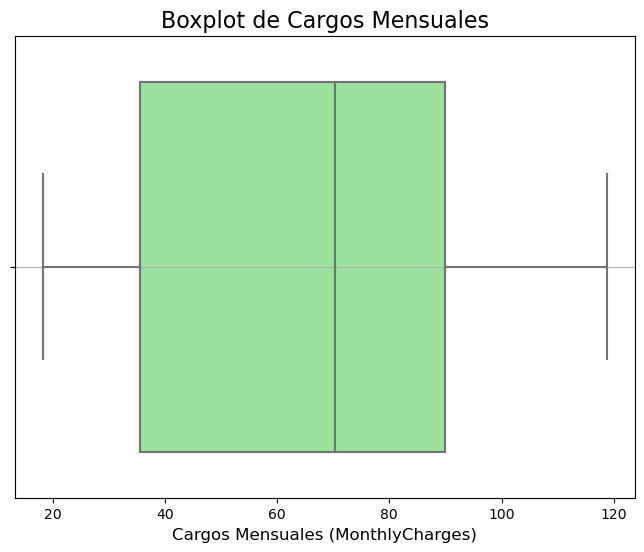

In [64]:
# Configuración del tamaño de la figura
plt.figure(figsize=(8, 6))

# Creación del boxplot usando Seaborn
sns.boxplot(data=df, x='MonthlyCharges', color='lightgreen')

# Títulos y etiquetas
plt.title('Boxplot de Cargos Mensuales', fontsize=16)
plt.xlabel('Cargos Mensuales (MonthlyCharges)', fontsize=12)

# Mostrar la cuadrícula
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()

Según la visualización podemos observar que la los cargos mensuales habitualmente se encuentran entre lso 40 y 90 (MONEDA CORRESPONDIENTE, USD)

### Visualización multivariada 1

<Axes: xlabel='Churn', ylabel='count'>

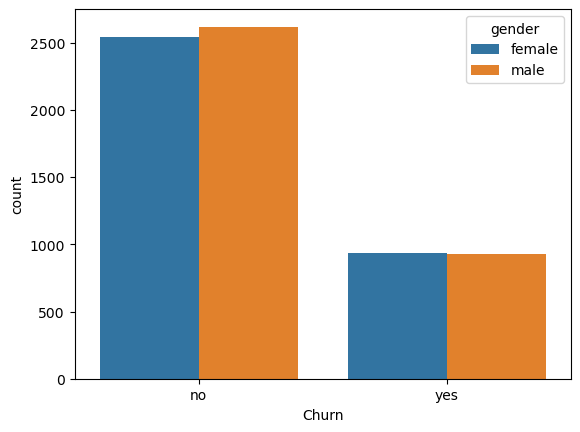

In [66]:
sns.countplot(df, x='Churn', hue='gender')

Se ve nuevamente que existe un desbalance entre los que permanecen con el servicio y los que no. En cuánto al genero si comparamos de manera separada, si existe un balance entre los que no cambiaron el servicio y los que si. Hay balance en cuanto al genero si lo miramos de esa manera.

### Visualización Multivariada 2

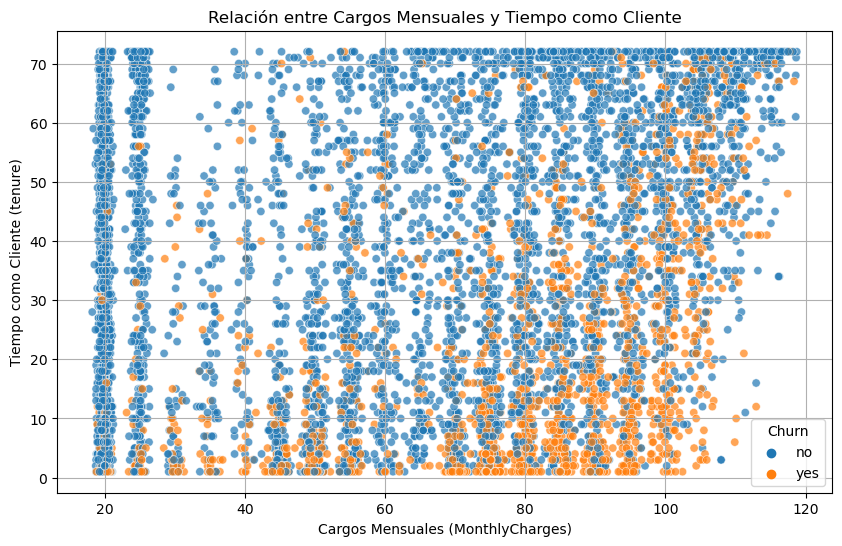

In [68]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear un gráfico de dispersión
sns.scatterplot(data=df, x='MonthlyCharges', y='tenure', hue='Churn', alpha=0.7)

# Personalizar el gráfico
plt.title('Relación entre Cargos Mensuales y Tiempo como Cliente')
plt.xlabel('Cargos Mensuales (MonthlyCharges)')
plt.ylabel('Tiempo como Cliente (tenure)')
plt.legend(title='Churn')
plt.grid(True)

# Mostrar el gráfico
plt.show()

Los datos se concentran principalmente en la parte infrerior izquierda del gráfico y sugiere que muchos clientes pagan cantidades moderadas y han sigo clientes relativamente corto.
Según se puede observar, existe una concentración de puntos naranjas en la parte superior derecha del gráfico, lo que indica que clientes que pagaban más y llevaban más tiempo con el servicio tenian más probabilidad de darse de baja.